<a href="https://colab.research.google.com/github/ElizaLo/ML-using-Jupiter-Notebook-and-Google-Colab/blob/master/Quora%20Insincere%20Questions%20Classification/Quora_Insincere_Questions_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quora Insincere Questions Classification

### **Detect toxic content to improve online conversations**

In [0]:
from google.colab import files
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import os
import sys
import re

tf.logging.set_verbosity(tf.logging.ERROR) # Устанавливает порог для того, какие сообщения будут регистрироваться.

In [107]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
os.chdir("/content/gdrive/My Drive/Quora Insincere Questions Classification")

In [0]:
train = pd.read_csv("train.csv", encoding = 'latin-1')
test = pd.read_csv("test.csv", encoding = 'latin-1')

In [110]:
train.head(15)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


In [112]:
train.columns = ['qid', 'question_text', 'target']
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [114]:
train_labels = train['target']
train_labels.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [115]:
test.head(15)

,qid,question_text
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?
2,000227734433360e1aae,What are the best made pocket knives under $20...
3,0005e06fbe3045bd2a92,Why would they add a hypothetical scenario tha...
4,00068a0f7f41f50fc399,What is the dresscode for Techmahindra freshers?
5,000a2d30e3ffd70c070d,How well are you adapting to the Trump era?
6,000b67672ec9622ff761,What should be the last thing people do in life?
7,000b7fb1146d712c1105,Received conditional offer for Masters in Inte...
8,000d665a8ddc426a1907,What does appareils photo mean in French?
9,000df6fd2229447b2969,Is there a system of Public Interest Litigatio...


In [116]:
print("Train shape: ",train.shape)
print("Test shape: ",test.shape)

Train shape:  (1306122, 3)
Test shape:  (56370, 2)


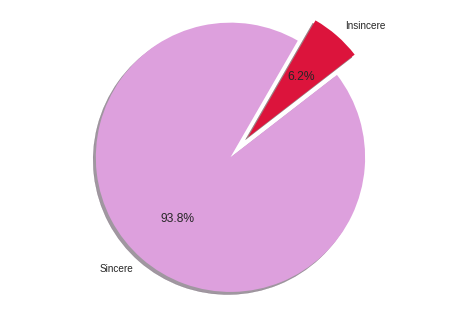

In [117]:
count_Class = pd.value_counts(train.target, sort = True)

# Data to Plot
target = 'Sincere', 'Insincere'
sizes = [count_Class[0], count_Class[1]]
colors = ['plum', 'crimson']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = target, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 60)
plt.axis('equal')
plt.show()

In [0]:
vectorizer = CountVectorizer()

In [149]:
train_data = train.question_text
vectorizer.fit_transform(train_data)

<1306122x199442 sparse matrix of type '<class 'numpy.int64'>'
	with 15103232 stored elements in Compressed Sparse Row format>

In [156]:
vectorizer.vocabulary_

{'how': 86034,
 'did': 54642,
 'quebec': 145705,
 'nationalists': 122632,
 'see': 159187,
 'their': 177628,
 'province': 143592,
 'as': 19971,
 'nation': 122613,
 'in': 89837,
 'the': 177518,
 '1960s': 2693,
 'do': 57040,
 'you': 197556,
 'have': 82239,
 'an': 16191,
 'adopted': 12231,
 'dog': 57238,
 'would': 195584,
 'encourage': 62847,
 'people': 135159,
 'to': 179582,
 'adopt': 12229,
 'and': 16459,
 'not': 126190,
 'shop': 162101,
 'why': 194021,
 'does': 57203,
 'velocity': 188976,
 'affect': 12730,
 'time': 179072,
 'space': 166821,
 'geometry': 75601,
 'otto': 130458,
 'von': 190994,
 'guericke': 79578,
 'used': 187317,
 'magdeburg': 109381,
 'hemispheres': 83248,
 'can': 34787,
 'convert': 45360,
 'montra': 118705,
 'helicon': 83067,
 'mountain': 119421,
 'bike': 27904,
 'by': 33698,
 'just': 97494,
 'changing': 38031,
 'tyres': 183695,
 'is': 93918,
 'gaza': 74911,
 'slowly': 164771,
 'becoming': 25689,
 'auschwitz': 21748,
 'dachau': 49545,
 'or': 129568,
 'treblinka': 18161

### The list of the most common words from train data

In [0]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [151]:
common_words = get_top_n_words(train_data, 50)
for word, freq in common_words:
    print(word, freq)

the 665913
what 469414
is 443164
to 407982
in 378141
of 333500
how 290354
and 257906
do 253226
are 243026
for 204466
you 201336
can 184546
why 163943
it 146516
my 112671
that 107583
if 98972
with 95924
on 94861
or 94614
have 92786
be 92093
does 86463
from 69849
your 67697
an 67470
which 65881
should 64592
when 62906
get 62764
best 62472
would 61495
as 60532
people 56336
some 54464
there 54271
who 52176
will 50745
like 49488
at 47943
not 47902
about 45168
they 44150
by 42714
did 41733
was 41665
we 40655
any 40161
so 39068


In [0]:
# Делим - 1) набір для тренування (60%) 2) набір для оцінки (20%) 3) набір ратифікації (20%)

"""def split_data(data):
  training = []
  evaluation = []
  validation = []
  for (index, row) in enumerate(data.values):
    ind = index % 10
    if ind < 6:
      training.append(row)
    elif ind < 8:
      evaluation.append(row)
    else:
      validation.append(row)
  return (pd.DataFrame(training, columns=data.columns), 
          pd.DataFrame(evaluation, columns=data.columns), 
          pd.DataFrame(validation, columns=data.columns))
      
training_data, evaluation_data, validation_data = split_data(exams)
"""